# Assessment Problems
---

## Problem 1: Extending the Lady Tasting Tea
---
Let's extend the Lady Tasting Tea experiment as follows. The original experiment has 8 cups: 4 tea-first and 4 milk-first. Suppose we prepare 12 cups: 8 tea-first and 4 milk-first. A participant claims they can tell which was poured first.

Simulate this experiment using numpy by randomly shuffling the cups many times and calculating the probability of the participant correctly identifying all cups by chance. Compare your result with the original 8-cup experiment.

In your notebook, explain your simulation process clearly, report and interpret the estimated probability, and discuss whether, based on this probability, you would consider extending or relaxing the p-value threshold compared to the original design.

The following problem is an experiment where 12 cups of tea are composed by 8 cups of tea-first and 4 cups with milk-first. In this experiment, I will check the probability of a person on identifying the cups by chance. In each step, I explain how I obtained this results. At the end, I will compare the results with the original 8-cup experiment. 

In [1]:
# Number of cups of tea in total.
nr_cups = 12

# Number of cups of tea with milk in first.
nr_cups_milk_first = 4

# Number of cups of tea with tea in first.
nr_cups_tea_first = 8

### math.comb(n, k)
In the next step, I use the math.comb to calculate the number of ways of selecting the 4 cups of tea with milk first from the total of 12 cups, and the result is the number of ways of selecting them without repetition and without regard to order.
https://docs.python.org/3/library/math.html#math.comb

#### Formula
The `math.comb()` function is represented by the following mathematical formula:
$\binom{n}{k} = \frac{n!}{k!(n-k)!}$

**k** is the number of elements to choose from a set of **n** element

In [2]:
# Mathematical functions from the standard library.
# https://docs.python.org/3/library/math.html
import math

# Number of ways of selecting four cups from twelve.
way_1 = math.comb(nr_cups, nr_cups_milk_first)

# Show.
way_1

495

If I check the number of ways of selecting 8 cups of tea-first from the total of 12 cups, the result will be the same. This happens because picking 4 cups of milk-first is the equivalent of choosing 8 cups that don't have milk-first, and those are the tea-first cups.

In [3]:
# Number of ways of selecting four cups from twelve. 
way_2 = math.comb(nr_cups, nr_cups_tea_first)

# Show.
way_2

495

#### Other way

In [4]:
# Total number of ways of selecting four cups from twelve, keeping them in order.
ways_ordered = 12 * 11 * 10 * 9

# Show.
ways_ordered

11880

In [5]:
# Number of ways of shuffling four cups.
no_shuffles = 4 * 3 * 2 * 1

# Show.
no_shuffles

24

In [6]:
# Number of combinations.
no_combs = ways_ordered // no_shuffles

# Show.
no_combs

495

#### Other way

In [7]:
# Number of cups of tea in total.
n = 12

# Number of cups of tea with milk in first.
k = 4

In [8]:
# Twelve factorial.
math.factorial(n)

479001600

In [9]:
# Four factorial.
math.factorial(k)

24

In [10]:
# Number of ways of selecting k objects from n without replacement and without order.
math.factorial(n) // (math.factorial(k) * math.factorial(n - k))

495

### Ordering of Results

Before performing the experiment of randomly identifying the 12 cups, they need to be labeled. To do this, the range() function generates the labels, and list() combines them into a list.

https://www.w3schools.com/python/ref_func_range.asp
https://www.geeksforgeeks.org/python/python-lists/
https://www.geeksforgeeks.org/python/range-to-a-list-in-python/

In [11]:
# The cup labels.
labels = list(range(nr_cups))

# Show.
labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

https://docs.python.org/3/library/itertools.html

In [12]:
# Permutations and combinations.
import itertools

# Show the different ways of selecting nr_cups_milk_first out of nr_cups cups of tea.
combs = list(itertools.combinations(labels, nr_cups_milk_first))

# Show.
### combs ### too long to display

# Number of combinations.
len(combs)

495

In the next step, the module random has the function random.sample() that can be used to attribute the label milk-first to 4 of the 12 cups. Then .sort() puts the list of selected cups in ascending order of the label, and finally the machine shows the cups that have the milk-first.

https://docs.python.org/3/library/random.html
https://docs.python.org/3/library/random.html#random.sample
https://www.w3schools.com/python/ref_list_sort.asp

In [13]:
# Random selections.
import random

# Select four cups at random to put milk in first.
labels_milk = random.sample(labels, 4)

# Sort, inplace.
labels_milk.sort()

# Show.
labels_milk

[0, 7, 8, 11]

In [14]:
# Turn labels_milk into a set.
## set(labels_milk)

Now, I can simulate the experiment, where the number of overlaps of a specific combination will be stored in an array. The `for` function loops through all the combinations that are possible. 

The s1 represents each combination. The s2 is the milk-first cups, this list needs to be converted into a set, because the order of selection doesn't matter. Then .intersection() checks how many combinations in s1 contain any elements from s2. After that, len() is the count of the overlaps and .append() adds this results to the no_overlaps. 
 
https://wiki.python.org/moin/ForLoop
https://docs.python.org/3/tutorial/datastructures.html#sets
https://www.w3schools.com/python/ref_set_intersection.asp
https://www.w3schools.com/python/ref_func_len.asp
https://realpython.com/python-append/#adding-items-to-a-list-with-pythons-append


In [15]:
# Calculate the overlap between each element of combs and labels_milk.
no_overlaps = []

# Loop through the combinations.
for comb in combs:
  # Turn comb into a set.
  s1 = set(comb)
  # Turn labels_milk into a set.
  s2 = set(labels_milk)
  # Figure out where they overlap.
  overlap = s1.intersection(s2)
  # Show the combination and the overlap.
  ##print(comb, len(overlap), overlap)
  # Append overlap to no_overlaps.
  no_overlaps.append(len(overlap))

In this next step, NumPy with the function np.unique shows how many distinct overlaps can occur and the number of times each overlap happens.

 https://numpy.org/doc/stable/reference/index.html#reference
 https://numpy.org/doc/stable/reference/generated/numpy.unique.html

In [16]:
# Numerical structures and operations.
import numpy as np

# Count the number of times each overlap occurs.
counts = np.unique(no_overlaps, return_counts=True)

# Show.
counts

(array([0, 1, 2, 3, 4]), array([ 70, 224, 168,  32,   1], dtype=int64))

The results show that there's 5 different combination outcomes that can occur of randomly selecting the milk-first cups and how many times it happens:
- 0 correct, 70 combinations;
- 1 correct, 224 combinations;
- 2 correct, 168 combinations;
- 3 correct, 32 combinations;
- 4 correct, 1 combination.

For visual representation, Matplotlib can be used. The function plt.subplots() creates a figure with axes for plotting. The .bar creates a bar chart, where the x-axis represents the distinct overlap values in the first array in counts, and the y is the number of combinations for each overlap  in the second array of counts. Finally, plt.show() displays the chart.

https://matplotlib.org/stable/contents.html
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar.html#matplotlib.axes.Axes.bar
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html

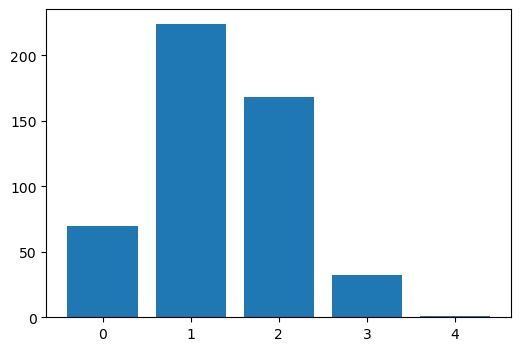

In [17]:
# Plotting.
import matplotlib.pyplot as plt

# Create a figure.
fig, ax = plt.subplots(figsize=(6, 4))

# Bar chart.
ax.bar(counts[0], counts[1])

# Show.
plt.show()

### The Null Hypothesis

Selection of four cups of milk first and eight cups of tea first from the twelve cups at random.

In [18]:
# The probability to get right answer.
1 / 495

0.00202020202020202

In [19]:
# The probability that randomly selecting at least three correct cups with milk first.
(32 + 1) / 495

0.06666666666666667

The probability of getting the right answer is much lower when the number os cups is increased. Compared to the 8 cup experiment, the probability of getting the right answer is 0.014, much better than 0.002 in the 12 cup experiment. To get at least 3 cups correct, it's also better in the other 0.242 than in this case with 0.066.

So you would consider extending or relaxing the p-value threshold compared to the original design?
Extending the p-value will turn the experiment even harder for the person trying to guess, so I don't think it will be necessary in order to be a good experiment. Relaxing the p-value a little bit would be acceptable as this is very hard on a null hypothesis case.

https://github.com/ianmcloughlin/applied-statistics/blob/main/materials/lady-tasting-tea.ipynb
https://en.wikipedia.org/wiki/Power_(statistics)#Description
https://en.wikipedia.org/wiki/Type_I_and_type_II_errors#Table_of_error_types


In [20]:
# The probability that randomly selecting at least one correct cup with milk first.
(224 + 168 + 32 + 1) / 495

0.8585858585858586

In [21]:
#### The probability that randomly selecting at least one correct cup with milk first in the 8 cup expirement.
(16 + 36 + 16 + 1)/70

0.9857142857142858

In [22]:
# The probability that randomly selecting no correct cup with milk first.
70/495

0.1414141414141414

## Problem 2: Normal Distribution
---
Generate 100,000 samples of size 10 from the standard normal distribution. For each sample, compute the standard deviation with ddof=1 (sample SD) and with ddof=0 (population SD). Plot histograms of both sets of values on the same axes with transparency. Describe the differences you see. Explain how you expect these differences to change if the sample size is increased.

In problem 2, I generate 100 000 samples of size 10 from the standard normal distribution. For each sample, compute the Standard Deviation (SD) calculated with the Delta Degrees of Freedom (ddof) equal to 1 (sample SD) and equal to 0 (population SD). 

https://en.wikipedia.org/wiki/Degrees_of_freedom_(statistics)#In_probability_distributions

Next, I plot histograms of both sets, I analyse the differences between them and explain if changes in sample size will have significant changes.

To generate the samples, the function from NumPy np.random.normal creates 100 000 samples of size 10.

https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
https://realpython.com/numpy-random-normal/#how-to-use-numpy-to-generate-normally-distributed-random-numbers

In [23]:
# Generate samples from a standard normal distribution, 100 000 samples of size 10.
samples = np.random.normal(loc=0, scale=1, size=(100000, 10))

Then, np.std generates a standard deviation of each sample. There's 2 different situations, in Sample SD the ddof=1 and in Population SD the ddof=0. Both sets are plotted in the same axis 1 so they can be compared.
According to the NumPy documentation, ddof=0 represents the
>"... sometimes called the “population standard deviation” in the field of statistics because it applies the definition of standard deviation to *a* as if *a* were a complete population of possible observations."

and then ddof=1 applies
>"...“Bessel’s correction” because it corrects for bias (toward lower values) in the variance estimate introduced when the sample mean of *a* is used in place of the true mean of the population. The resulting estimate of the standard deviation is still biased, but less than it would have been without the correction."

https://numpy.org/doc/stable/reference/generated/numpy.std.html

In [24]:
# Sample standard deviation (ddof=1)
sample_sd = np.std(samples, axis=1, ddof=1)

# Population standard deviation (ddof=0)
population_sd = np.std(samples, axis=1, ddof=0)

Now for plotting, I created a figure with axes with plt.subplots(). Then, I plotted both histograms, ax.hist, with the following settings:
histtype='step' type that outline them, for a clear representation both of them; bins evenly spaced with np.linspace; each with different colors; labels; and with density=True to draw and return a probability density.
After that, I set labels for both axes, ax.set_xlabel and ax.set_ylabel. Finally, I add title ax.set_title, legend ax.legend(), grid ax.grid() and show with plt.show().

https://numpy.org/doc/stable/reference/generated/numpy.linspace.html
https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html
https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html
https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_ylabel.html
https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html
https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.legend.html
https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.grid.html

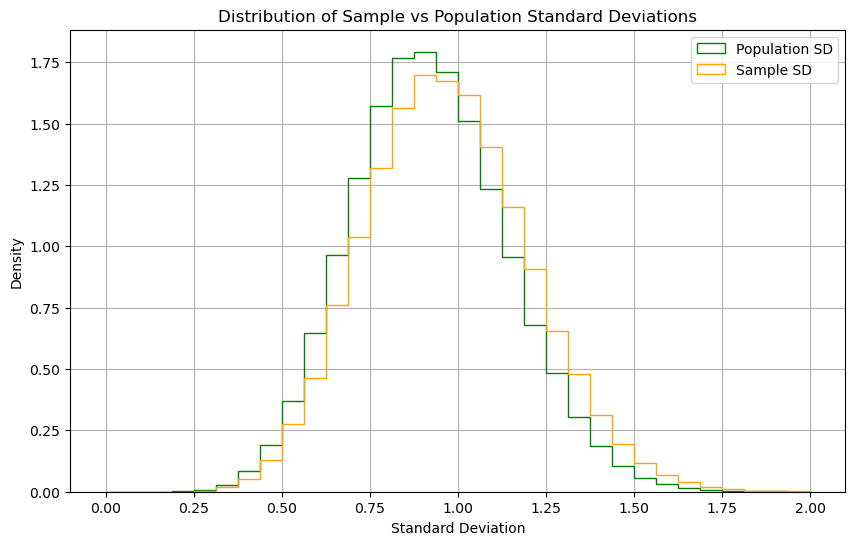

In [25]:
# Create figure and axis.
fig, ax = plt.subplots(figsize=(10, 6))

# Plot histograms of both standard deviations.
ax.hist(population_sd, histtype='step', bins=np.linspace(0.0, 2.0, 33), color='green', label='Population SD', density=True)
ax.hist(sample_sd, histtype='step', bins=np.linspace(0.0, 2.0, 33), color='orange', label='Sample SD', density=True)

# Add labels and title.
ax.set_xlabel('Standard Deviation')
ax.set_ylabel('Density')
ax.set_title('Distribution of Sample vs Population Standard Deviations')

# Add legend.
ax.legend()

# Add grid.
ax.grid(visible=True)

# Show.
plt.show()

In [26]:
# Generate samples from a standard normal distribution, 100 000 samples of size 100.
samples_2 = np.random.normal(loc=0, scale=1, size=(100000, 100))

# Sample standard deviation (ddof=1)
sample_sd_2 = np.std(samples_2, axis=1, ddof=1)

# Population standard deviation (ddof=0)
population_sd_2 = np.std(samples_2, axis=1, ddof=0)

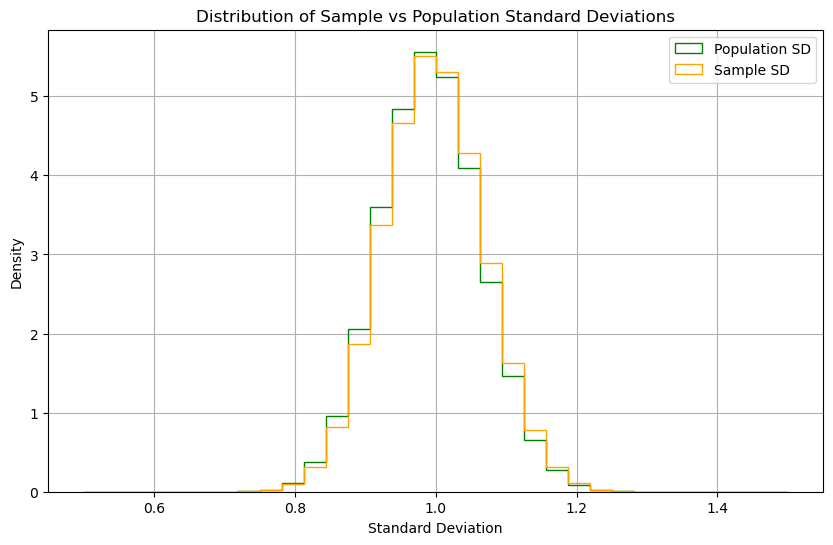

In [27]:
# Create figure and axis.
fig, ax = plt.subplots(figsize=(10, 6))

# Plot histograms of both standard deviations.
ax.hist(population_sd_2, histtype='step', bins=np.linspace(0.5, 1.5, 33), color='green', label='Population SD', density=True)
ax.hist(sample_sd_2, histtype='step', bins=np.linspace(0.5, 1.5, 33), color='orange', label='Sample SD', density=True)

# Add labels and title.
ax.set_xlabel('Standard Deviation')
ax.set_ylabel('Density')
ax.set_title('Distribution of Sample vs Population Standard Deviations')

# Add legend.
ax.legend()

# Add grid.
ax.grid(visible=True)

# Show.
plt.show()

The higher the number of samples, the difference between the two histograms becomes smaller. The distributions also become narrower, as standard deviation estimates are more stable with larger samples.

With small sample sizes, the Sample SD distribution is slightly larger than the Population SD due to Bessel’s correction. The distribution is also slightly wider in Sample SD, as there's more variability with the smaller samples.

---
## End